### This exercise explores skills around working with datetime series and visualisation in python
   #### The data being explored was obtained from Kaggle. The data set contains over 4.5 million Uber pickups in New York 
   #### This exercise explores September 2014 of th data set


In [3]:
# import libraries
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [138]:
# ingest data for selected month by loading CSV into memory. 
# data source = https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city

sep14 = pd.read_csv('C:\\Users\\Ibitoye\\OneDrive\\edX_DATA_SCIENCE\\miniProject\\uberData\\uber-raw-data-sep14.csv', header=0)
sep14.head(12)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
5,9/1/2014 0:12:00,40.6735,-73.9918,B02512
6,9/1/2014 0:15:00,40.7471,-73.6472,B02512
7,9/1/2014 0:16:00,40.6613,-74.2691,B02512
8,9/1/2014 0:32:00,40.3745,-73.9999,B02512
9,9/1/2014 0:33:00,40.7633,-73.9773,B02512


In [139]:
sep14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
Date/Time    1028136 non-null object
Lat          1028136 non-null float64
Lon          1028136 non-null float64
Base         1028136 non-null object
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [140]:
# add useful colums like 'day of the month', 'month' or 'hour' by converting 'Date/Time' to pd.to_datetime.

sep14['Date/Time'] = sep14['Date/Time'].map(pd.to_datetime)
sep14.head(13)

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512
5,2014-09-01 00:12:00,40.6735,-73.9918,B02512
6,2014-09-01 00:15:00,40.7471,-73.6472,B02512
7,2014-09-01 00:16:00,40.6613,-74.2691,B02512
8,2014-09-01 00:32:00,40.3745,-73.9999,B02512
9,2014-09-01 00:33:00,40.7633,-73.9773,B02512


In [92]:
sep14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
Date/Time    1028136 non-null datetime64[ns]
Lat          1028136 non-null float64
Lon          1028136 non-null float64
Base         1028136 non-null object
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 31.4+ MB


## Create a new table with more useful columns exploting hours, day of month and weekday

In [141]:
sept14 = sep14

def get_dom(dt):
    return dt.day
sept14['Day Of Month'] = sept14['Date/Time'].map(get_dom)


def get_weekday(dt):
    return dt.dayofweek
sept14['Week Day'] = sept14['Date/Time'].map(get_weekday)


def get_hour(dt):
    return dt.hour
sept14['Hour of Day'] = sept14['Date/Time'].map(get_hour)

sept14.head()

,Date/Time,Lat,Lon,Base,Day Of Month,Week Day,Hour of Day
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [142]:
sept14.head(20)

,Date/Time,Lat,Lon,Base,Day Of Month,Week Day,Hour of Day
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0
5,2014-09-01 00:12:00,40.6735,-73.9918,B02512,1,0,0
6,2014-09-01 00:15:00,40.7471,-73.6472,B02512,1,0,0
7,2014-09-01 00:16:00,40.6613,-74.2691,B02512,1,0,0
8,2014-09-01 00:32:00,40.3745,-73.9999,B02512,1,0,0
9,2014-09-01 00:33:00,40.7633,-73.9773,B02512,1,0,0


### A - Analysis - Explore data for insight by asking questions

In [143]:
# what does the data look like generally.

sept14.index, sept14.columns

(RangeIndex(start=0, stop=1028136, step=1),
 Index(['Date/Time', 'Lat', 'Lon', 'Base', 'Day Of Month', 'Week Day',
        'Hour of Day'],
       dtype='object'))

In [144]:
sept14.describe()

,Lat,Lon,Day Of Month,Week Day,Hour of Day
count,1.028136e+06,1.028136e+06,1.028136e+06,1.028136e+06,1.028136e+06
mean,4.073922e+01,-7.397182e+01,1.555385e+01,2.961477e+00,1.409235e+01
std,4.082861e-02,5.831413e-02,8.448335e+00,1.942572e+00,5.971244e+00
min,3.998970e+01,-7.477360e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.072040e+01,-7.399620e+01,8.000000e+00,1.000000e+00,1.000000e+01
50%,4.074180e+01,-7.398310e+01,1.600000e+01,3.000000e+00,1.500000e+01
75%,4.076120e+01,-7.396280e+01,2.300000e+01,5.000000e+00,1.900000e+01
max,4.134760e+01,-7.271630e+01,3.000000e+01,6.000000e+00,2.300000e+01


In [98]:
sept14.shape[0], sept14.shape[1]

(1028136, 7)

### B - Analysis - Explore data around DAYS

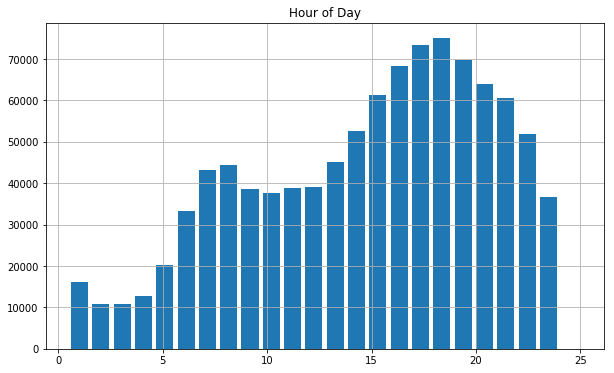

In [145]:
#plt.figure(figsize= (19,16))
p = sept14.hist(column='Hour of Day',bins=24, range=(0.5, 25), rwidth=.8, figsize=(10,6))


In [146]:
x_base = sept14.groupby(['Base']).groups.keys()
x_base

dict_keys(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'])

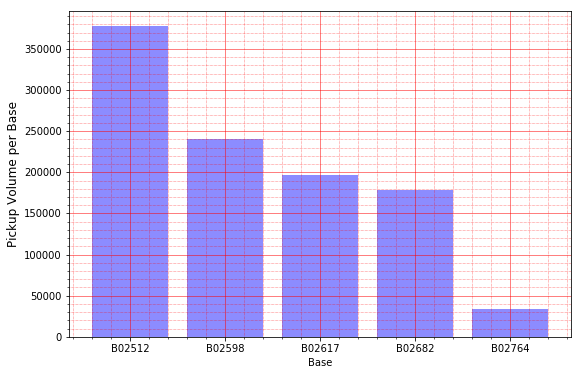

In [147]:
#plot shows pickup distribution according to base.

x_base = sept14.groupby(['Base']).groups.keys()
y_volume = sept14['Base'].value_counts()

plt.figure(figsize=(9,6))
plt.bar(x_base,y_volume, color='blue', alpha=0.45)

plt.ylabel('Pickup Volume per Base', fontsize=12)
plt.xlabel('Base')
plt.xticks(rotation=0)

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth=0.5, color='red' )
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='red' )

plt.show()

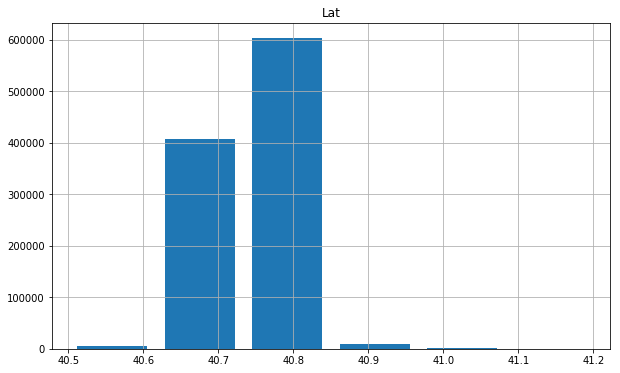

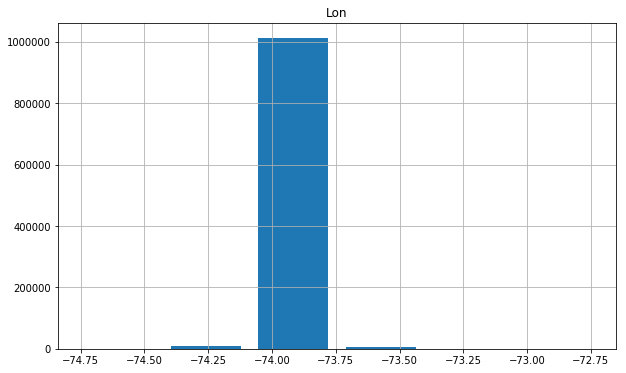

In [148]:
sept14.hist(column='Lat', bins=6, rwidth=.8, range=(40.5,41.2), figsize=(10,6)); 
sept14.hist(column='Lon', bins=6, rwidth=.8,  figsize=(10,6));

In [152]:
sept14.head()


,Date/Time,Lat,Lon,Base,Day Of Month,Week Day,Hour of Day
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [153]:
x_sept14 = sept14
x_sept14.set_index('Date/Time', inplace=False)
x_sept14.sample(13)

,Date/Time,Lat,Lon,Base,Day Of Month,Week Day,Hour of Day
986150,2014-09-25 17:43:00,40.7749,-73.9914,B02764,25,3,17
659952,2014-09-02 16:54:00,40.6119,-74.0240,B02682,2,1,16
23562,2014-09-19 16:52:00,40.7179,-74.0070,B02512,19,4,16
185078,2014-09-19 07:33:00,40.7733,-73.9544,B02598,19,4,7
273380,2014-09-30 19:26:00,40.7621,-73.9815,B02598,30,1,19
606411,2014-09-26 22:58:00,40.7262,-73.9918,B02617,26,4,22
10292,2014-09-08 22:19:00,40.7284,-73.9996,B02512,8,0,22
723979,2014-09-11 18:53:00,40.7685,-73.8625,B02682,11,3,18
900531,2014-09-12 10:53:00,40.6749,-73.9649,B02764,12,4,10
897545,2014-09-11 19:13:00,40.7280,-73.9574,B02764,11,3,19


In [ ]:
x_sept14

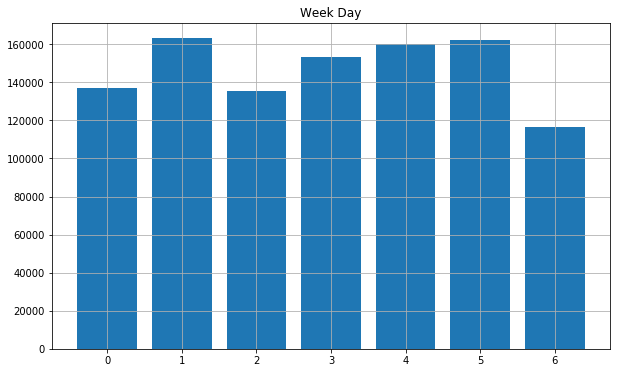

In [108]:
pz = sept14.hist(column='Week Day', bins=7, range =(-.5,6.5), rwidth=.8, figsize=(10,6))
# monday = 0, sunday = 6

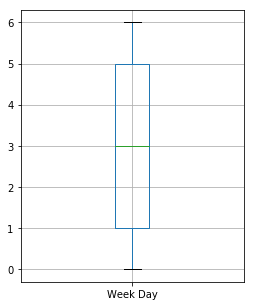

In [19]:
sept14.boxplot(column='Week Day', figsize= (4,5))
#

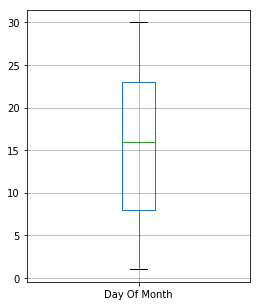

In [20]:
 sept14.boxplot(column='Day Of Month', figsize= (4,5))

### C - Analysis - Explore data around WEEK

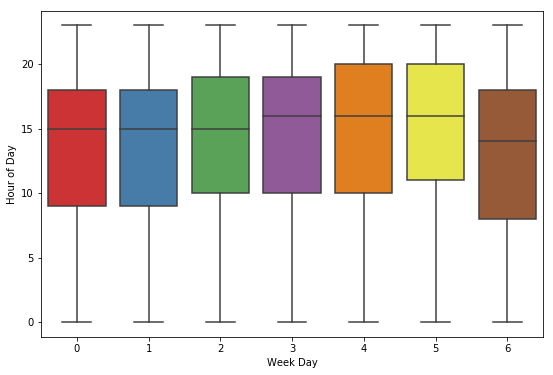

In [21]:
#byDate = pd.crosstab(sept14['Week Day'],sept14['Hour of Day'])

plt.figure(figsize= (9,6))
sns.boxplot(x=sept14['Week Day'], y=sept14['Hour of Day'], data=sept14, palette="Set1")


## Table below shows what time and day has the highest pickup frequency

In [22]:
byDate = pd.crosstab(sept14['Week Day'],sept14['Hour of Day'])
byDate

Hour of Day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week Day,,,,,,,,,,,,,,,,,,,,,
0,1885,1201,977,1780,2479,3905,5668,7223,7287,5892,...,7113,8346,9513,9841,9611,8725,8318,6979,5130,2936
1,1411,784,609,1221,2093,4196,7393,9466,9374,7082,...,8374,9935,11108,12369,12184,11091,10370,9022,6538,2956
2,1489,885,597,966,1612,3130,5699,7067,6665,5356,...,6867,8331,9451,10294,10250,9268,9108,7951,6179,3408
3,1762,1037,714,1088,1720,2754,5586,7790,7663,6330,...,7419,8887,10196,11302,11738,10958,10076,9820,7885,5164
4,2513,1530,1002,1347,1819,3115,5186,6698,6715,5615,...,7431,8696,9792,11175,12315,11765,10345,10947,10797,9366
5,6909,4737,2957,2029,1458,1544,2092,2790,3664,4352,...,8732,9857,10494,11021,11753,11423,9841,10723,11173,10412
6,8164,5933,3846,2358,1494,1618,1683,2280,3109,3915,...,6707,7167,7670,7371,7189,6430,5930,5164,4115,2326


## Cross Table Analysis - Week, Days, Month

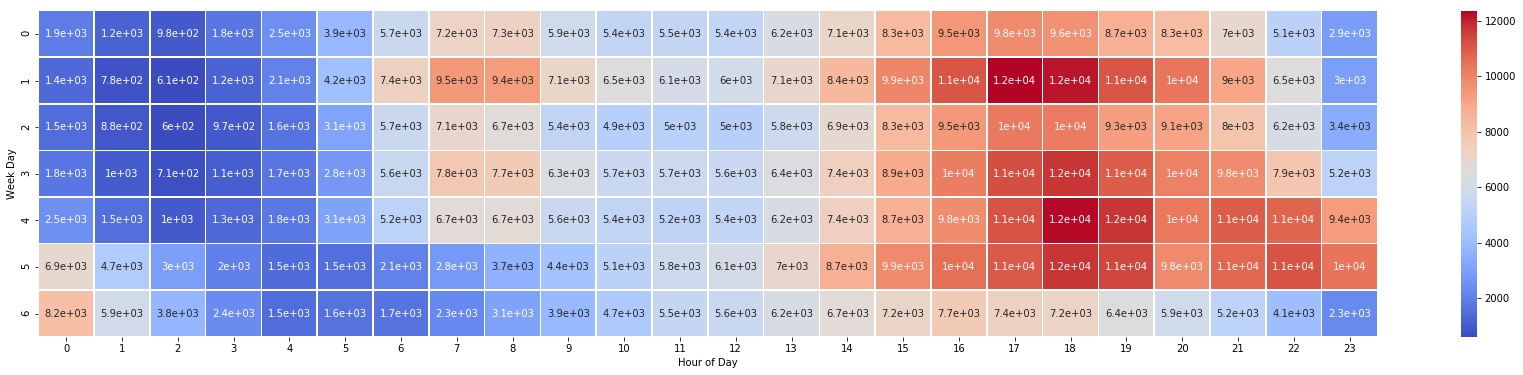

In [24]:
# explore frequency of pick ups to show what day of the week and what time of the day has the highest.

plt.figure(figsize= (30,6))
sns.heatmap(byDate, cmap='coolwarm', annot=True, linewidth=.5)

## Heat Map Showing Pick Up Frequency @ Time of Day & Day of Month

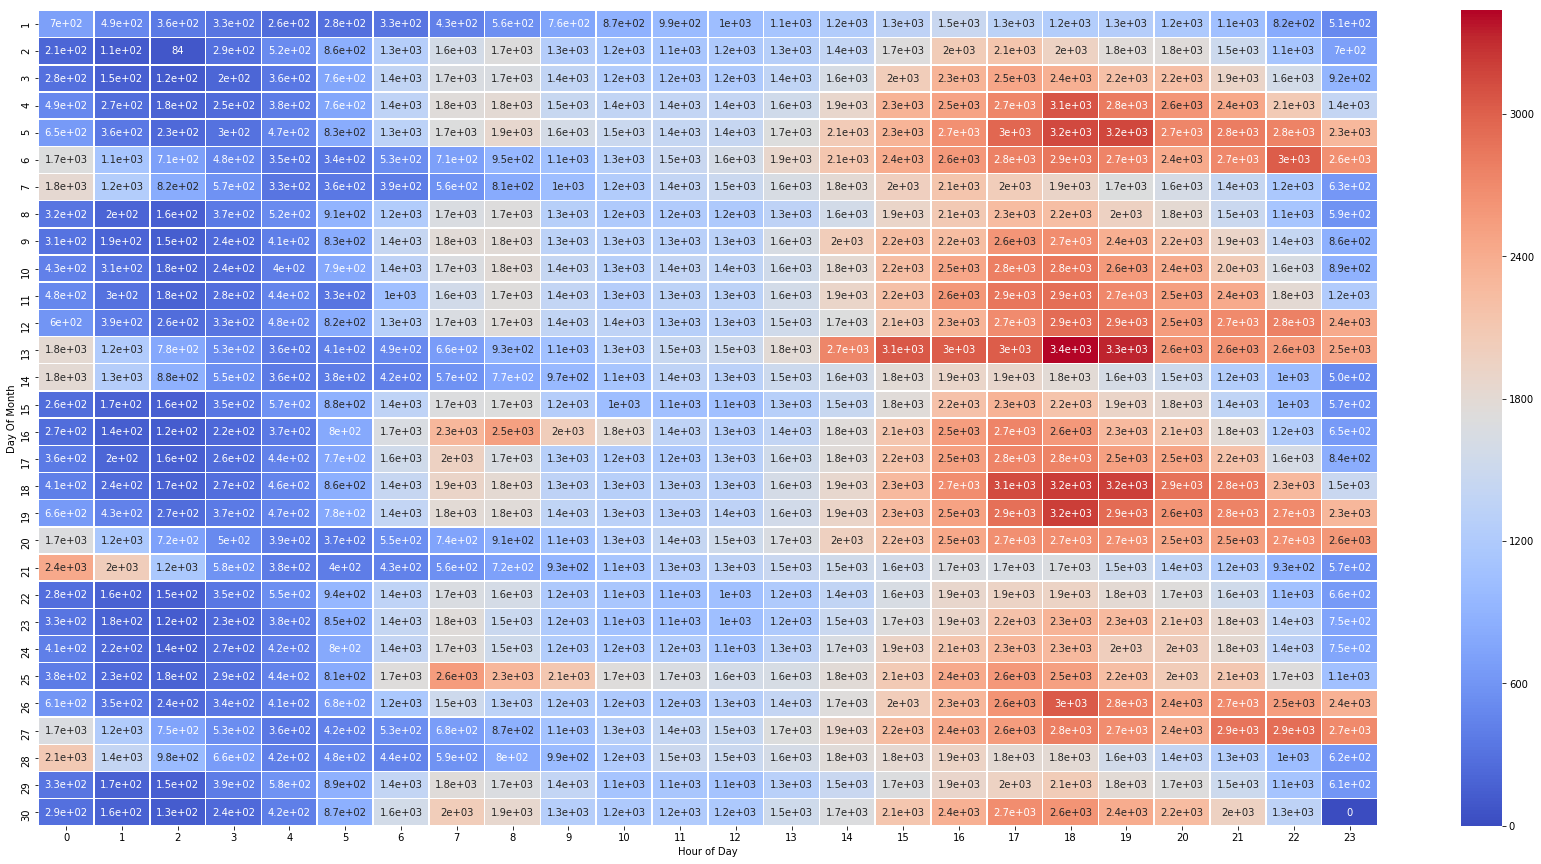

In [25]:
# explore frequency of pick ups to show what time of the day and what day of the month has the highest.

plt.figure(figsize= (30,15))
#seaborn.heatmap(byDate, cmap='coolwarm', annot=False, linewidth=.5)

byDatez = pd.crosstab(sept14['Day Of Month'],sept14['Hour of Day'])
byDatez
sns.heatmap(byDatez, cmap='coolwarm', annot=True, linewidth=.5)

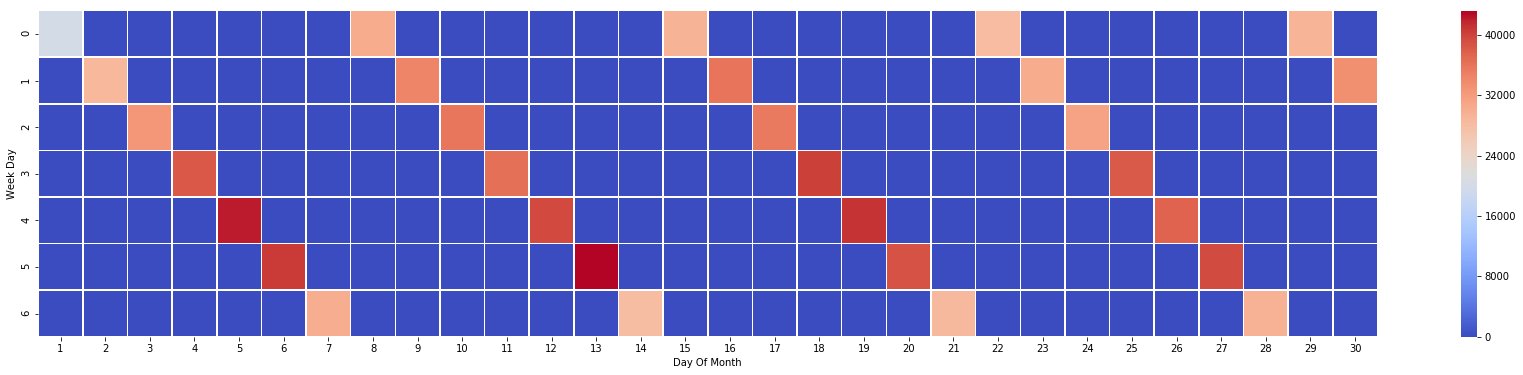

In [26]:
plt.figure(figsize= (30,6))
byDateP = pd.crosstab(sept14['Week Day'],sept14['Day Of Month'])
byDateP
sns.heatmap(byDateP, cmap='coolwarm', annot=False, linewidth=.5)

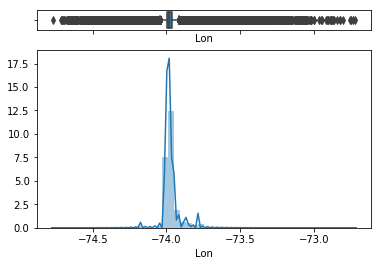

In [39]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.55, 5)})

# Add a graph in each part
sns.boxplot(sept14["Lon"], ax=ax_box)
sns.distplot(sept14["Lon"], ax=ax_hist)

In [41]:
x_cood= sept14['Lon'].unique()
print(x_cood)

[-74.0021 -74.0027 -73.9864 ... -73.1711 -73.0575 -74.2278]


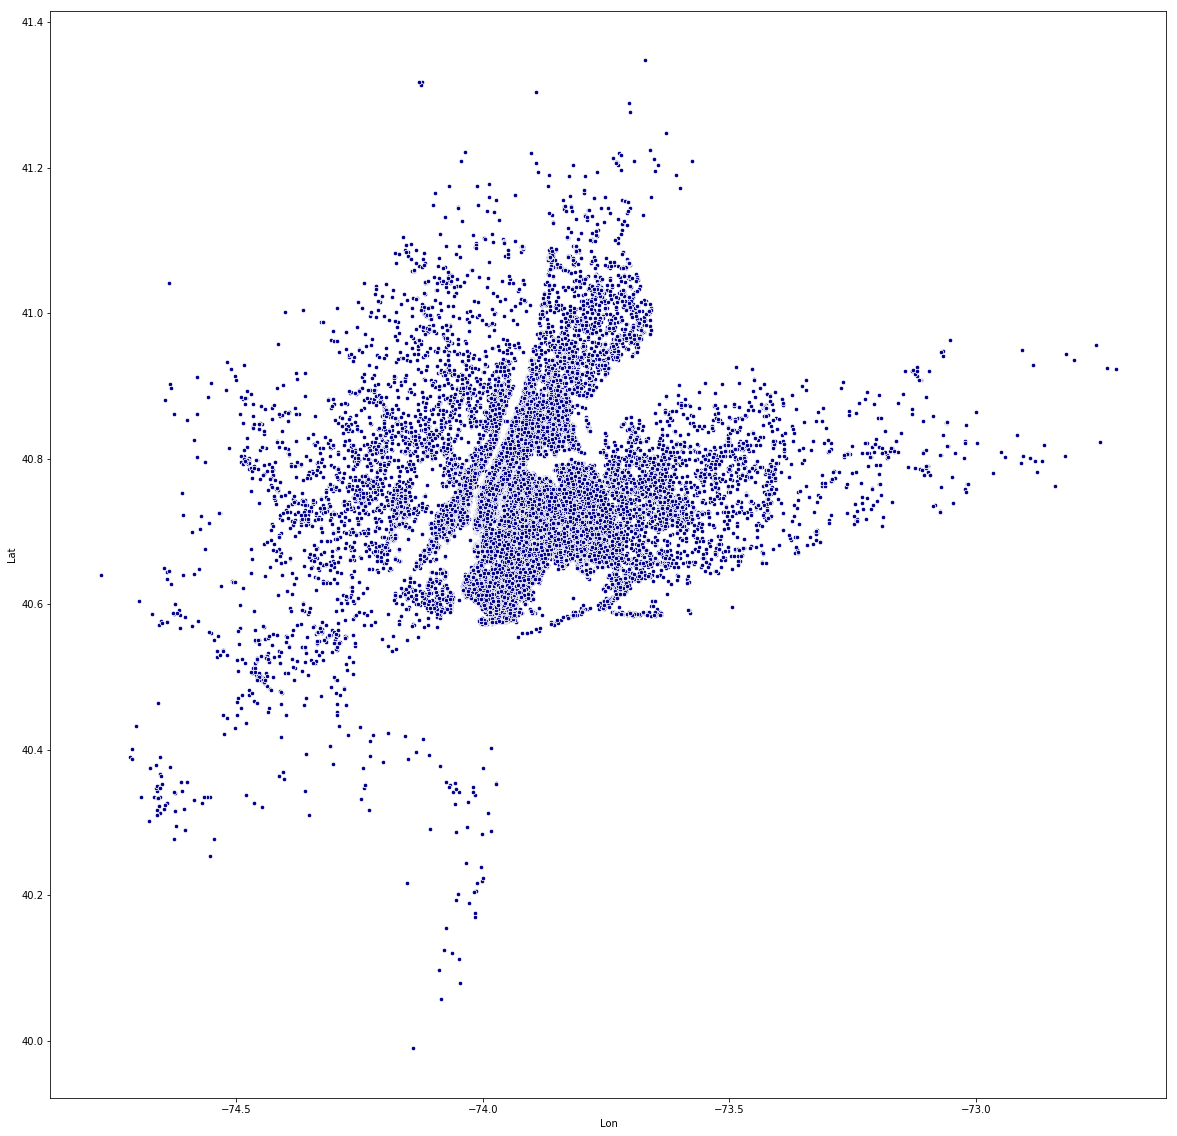

In [43]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Lon', y='Lat', data=sept14, s=20, c=['darkblue'], alpha=1)